In [2]:
import numpy as np
import os

In [3]:
# X-Median (px), Y-Median (px), X-Peak (px), Y-Peak (px), X-Location (mm), Y-Location (mm)
data={}
for i in range(55,145):
    if i<100:
        data[i]= (np.loadtxt(f"BeamLoc_D1542_D1542_9_12_dipole_scan_0{i}.csv")[4],np.loadtxt(f"BeamLoc_D1542_D1542_9_12_dipole_scan_0{i}.csv")[5])
    else:
        data[i]= (np.loadtxt(f"BeamLoc_D1542_D1542_9_12_dipole_scan_{i}.csv")[4],np.loadtxt(f"BeamLoc_D1542_D1542_9_12_dipole_scan_{i}.csv")[5])


In [4]:
data

{55: (-2.714285714285714, -2.142857142857143),
 56: (1.2857142857142856, -0.7142857142857142),
 57: (-4.285714285714286, -8.285714285714285),
 58: (-2.8571428571428568, -3.0),
 59: (1.5714285714285714, -0.42857142857142855),
 60: (-4.428571428571428, -8.142857142857142),
 61: (-3.0, -3.571428571428571),
 62: (-0.8571428571428571, -1.2857142857142856),
 63: (-4.142857142857142, -9.571428571428571),
 64: (-3.2857142857142856, -3.142857142857143),
 65: (-0.2857142857142857, -0.8571428571428571),
 66: (-4.428571428571428, -8.428571428571429),
 67: (-3.4285714285714284, -2.571428571428571),
 68: (0.14285714285714285, -0.7142857142857142),
 69: (-4.571428571428571, -8.714285714285714),
 70: (-3.714285714285714, -2.2857142857142856),
 71: (-0.2857142857142857, -0.5714285714285714),
 72: (-4.714285714285714, -8.428571428571429),
 73: (-4.0, -3.2857142857142856),
 74: (-2.0, -1.0),
 75: (-4.714285714285714, -9.0),
 76: (-4.142857142857142, -3.714285714285714),
 77: (-2.2857142857142856, -0.8571

In [5]:
def Dist(x, y):
    meas_num=  len(x)*2
    dist= 1/meas_num * (np.power((x[0]-x[1]),2)
                      + np.power((y[0]-y[1]),2)
                      + np.power((x[1]-x[2]),2) 
                      + np.power((y[1]-y[2]),2) 
                      + np.power((x[0]-x[2]),2) 
                      + np.power((y[0]-y[2]),2)
                       ) 
    return dist

In [6]:
distances= []

for i in range(55, 143, 3):
    
    x_dist=[]
    y_dist=[]
    
    for j in range(i, i+3):
        x_dist.append(data[j][0])
        y_dist.append(data[j][1])
        
    distances.append(np.sqrt(Dist(x_dist, y_dist)))

    x_dist=[]
    y_dist=[]
    

In [7]:
avg_fields= [0.231274,0.2312545,0.231229,0.2311695,0.231151,0.2311,0.231065,0.2310305,0.2309955,0.230969,0.230927,0.230891,0.2308555,0.2308215,0.230785,0.2307515,0.2307155,0.230681,0.2306455,0.2306265,0.230576,0.230548,0.230506,0.230486,0.230436,0.230394,0.230367,0.2303245,0.2302885,0.2302545]

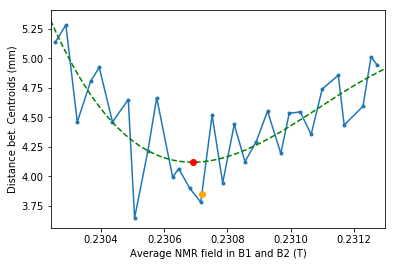

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#fig= plt.figure(figsize=(10,8))
plt.plot(avg_fields, distances, marker='.')
plt.plot( 0.230719, 3.85, marker='.', color='orange', markersize=12)
plt.xlim(0.23024, 0.2313)
#plt.xlim(0.23068, 0.23070)
#plt.ylim(4.119,4.12)

plt.xlabel('Average NMR field in B1 and B2 (T)')
plt.ylabel('Distance bet. Centroids (mm)')
#plt.xticks(np.arange(0.23024, 0.2313, 0.0001))

z = np.polyfit(avg_fields, distances, 3)
p = np.poly1d(z)


xp= np.linspace(0.23024, 0.2313, 100)
plt.plot(xp, p(xp), '--' , color='green')
plt.plot(0.23069, p(xp).min(), marker='.', color='red', markersize= 12)

plt.show()
#plt.savefig("dipolescan_dist_field.png", dpi=300)

In [9]:
diff = (0.23069-0.230719)/0.23069*100
abs(diff)

0.012570982704062266

In [14]:
xp[p(xp).argmin()]

0.23068969696969696